In [18]:
# Initial imports
import os
import pandas as pd
import numpy as np
import requests
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline
from dotenv import load_dotenv
load_dotenv()


True

In [19]:
# Reading the News API key enviroment variable
api_key = os.getenv("crypto_news_key")

In [20]:
#requests.get(request_url).json()

In [21]:
frames = []
sentiments = []

for page in range(0,40):
    request_url = f'https://cryptonews-api.com/api/v1?tickers=ETH&items=50&date=yeartodate&sortby=oldestfirst&page={page+1}&token='+ api_key
    
    
    
    
    
    try:
        test=requests.get(request_url).json()

        frames.append(pd.DataFrame(test['data']))
        
        

        for data in test["data"]:
            try:
                text = data["text"]
                date= data['date']
                results = analyzer.polarity_scores(text)
                compound = results["compound"]
                pos = results["pos"]
                neu = results["neu"]
                neg = results["neg"]

                sentiments.append({
                    'date':date,
                    "text": text,
                    "Compound": compound,
                    "Positive": pos,
                    "Negative": neg,
                    "Neutral": neu,
                })
            except AttributeError:
                pass

        

    except Exception as err:
        
        try:
            test=requests.get(request_url).json()

            frames.append(pd.DataFrame(test['data']))
   
            
        except Exception as err:
            print ("OOps: Something Else",err)
    
    #event_df = pd.DataFrame(data = raw_crypto_events['data'])
    #print(requests.get(request_url).json())
#frames[]



#btc.head()
eth  = pd.DataFrame(sentiments)
eth['date'] = pd.to_datetime(eth['date'],utc=True).dt.date
eth.set_index(eth['date'], inplace=True)
eth.drop(columns=['date'], inplace=True)

combined_df = pd.concat(frames,ignore_index=True, sort=False)

#add re-indexing
combined_df = combined_df.drop(columns = ['news_url','image_url','title','source_name','topics','sentiment','type'] )
#combined_df['compound'] = combined_df.text.apply(analyzer.polarity_scores)
combined_df['date'] = pd.to_datetime(combined_df['date'],utc=True).dt.date
combined_df.set_index(combined_df['date'], inplace=True)
combined_df.drop(columns=['date'], inplace=True)


combined_df.to_csv('ETH_TEXT.csv', index = True)
eth.to_csv('ETH_sentiments.csv', index = True)

#combined_df.head()

pd.read_csv('ETH_TEXT.csv')
#combined_df.head()



,date,text,tickers
0,2020-12-01,"When Bitcoin's genesis block first launched, a...",['ETH']
1,2020-12-01,Ethereum is moving from a proof-of-work blockc...,['ETH']
2,2020-12-01,"Ethereum 2.0's beacon chain goes live, heraldi...","['BTC', 'ETH']"
3,2020-12-02,"Powered by Every week, IntoTheBlock brings you...","['BTC', 'ETH']"
4,2020-12-03,The US crypto exchange is matching donations r...,['ETH']
...,...,...,...
1956,2021-03-21,Ethereum (ETH/USD) continues to orbit the 1750...,['ETH']
1957,2021-03-21,Rich Dad Poor Dad author Robert Kiyosaki says ...,"['BTC', 'ETH']"
1958,2021-03-21,The upcoming Berlin update contains EIPs aimed...,['ETH']
1959,2021-03-21,Bots are primed to snap up the last MoonCats y...,['ETH']


In [22]:
pd.read_csv('ETH_sentiments.csv')

,date,text,Compound,Positive,Negative,Neutral
0,2020-12-01,"When Bitcoin's genesis block first launched, a...",-0.2263,0.077,0.075,0.848
1,2020-12-01,Ethereum is moving from a proof-of-work blockc...,0.6486,0.128,0.000,0.872
2,2020-12-01,"Ethereum 2.0's beacon chain goes live, heraldi...",0.4215,0.093,0.039,0.869
3,2020-12-02,"Powered by Every week, IntoTheBlock brings you...",0.2023,0.053,0.000,0.947
4,2020-12-03,The US crypto exchange is matching donations r...,0.0000,0.000,0.000,1.000
...,...,...,...,...,...,...
1956,2021-03-21,Ethereum (ETH/USD) continues to orbit the 1750...,0.3182,0.062,0.000,0.938
1957,2021-03-21,Rich Dad Poor Dad author Robert Kiyosaki says ...,0.8996,0.242,0.136,0.622
1958,2021-03-21,The upcoming Berlin update contains EIPs aimed...,-0.3491,0.000,0.126,0.874
1959,2021-03-21,Bots are primed to snap up the last MoonCats y...,0.5106,0.142,0.000,0.858


In [23]:
eth.describe()

,Compound,Positive,Negative,Neutral
count,1961.000000,1961.000000,1961.000000,1961.000000
mean,0.192342,0.082034,0.034649,0.883312
std,0.395193,0.080227,0.055025,0.091342
min,-0.916100,0.000000,0.000000,0.519000
25%,0.000000,0.000000,0.000000,0.828000
50%,0.202300,0.073000,0.000000,0.895000
75%,0.493900,0.128000,0.062000,0.950000
max,0.947900,0.446000,0.451000,1.000000


In [24]:
eth= eth.drop(columns = ['text','Positive','Negative','Neutral'])
eth

,Compound
date,
2020-12-01,-0.2263
2020-12-01,0.6486
2020-12-01,0.4215
2020-12-02,0.2023
2020-12-03,0.0000
...,...
2021-03-21,0.3182
2021-03-21,0.8996
2021-03-21,-0.3491


In [25]:
eth = eth.groupby(['date']).mean()
eth.describe()

,Compound
count,111.000000
mean,0.197875
std,0.113435
min,-0.102031
25%,0.125068
50%,0.193860
75%,0.275292
max,0.518978


In [26]:
upperbound =0.2751
lowerbound =0.125

#eth=eth.pivot_table(index='date'aggfunc)
eth['bullish']=np.where(eth['Compound']>upperbound,1.0,0.0)
eth['bearish']=np.where(eth['Compound']<lowerbound,-1.0,0.0)
eth['signal']=eth['bearish']+eth['bullish']
eth=eth.drop(columns = ['bullish','bearish','Compound'])
eth

,signal
date,
2020-12-01,1.0
2020-12-02,0.0
2020-12-03,0.0
2020-12-04,1.0
2020-12-05,0.0
...,...
2021-03-17,0.0
2021-03-18,0.0
2021-03-19,0.0


In [27]:
eth.describe()

,signal
count,111.000000
mean,0.000000
std,0.713506
min,-1.000000
25%,-0.500000
50%,0.000000
75%,0.500000
max,1.000000


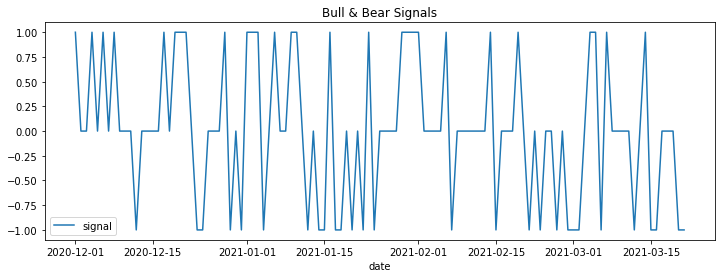

In [48]:
eth.plot(y='signal',title = 'Bull & Bear Signals',figsize=(12,4))

In [29]:
eth.to_csv('ETH_bull_bear_signals.csv', index = True)


In [30]:
pd.read_csv('ETH_bull_bear_signals.csv')

,date,signal
0,2020-12-01,1.0
1,2020-12-02,0.0
2,2020-12-03,0.0
3,2020-12-04,1.0
4,2020-12-05,0.0
...,...,...
106,2021-03-17,0.0
107,2021-03-18,0.0
108,2021-03-19,0.0
109,2021-03-20,-1.0


In [31]:
eth

,signal
date,
2020-12-01,1.0
2020-12-02,0.0
2020-12-03,0.0
2020-12-04,1.0
2020-12-05,0.0
...,...
2021-03-17,0.0
2021-03-18,0.0
2021-03-19,0.0


In [16]:
#eth = eth.groupby('date', as_index=False, sort=False)['signal'].mean()


In [17]:
#eth = eth.groupby(['date']).sum()

#eth = eth.groupby(['date']).mean()

#eth = eth.groupby(['date'],dropna = ).mean()
#eth